# **Bioinformatics Project - Comparing Classifiers for Building Classification Models**


[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)


## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
df = pd.read_csv('coronavirus3c-likeproteinase_bioactivity_data_3class_pIC50_pubchem_fingerprint.csv')

## **3. Input features**
The ***Coronavirus*** data set contains input features and 1 output variable (pIC50 values).

### **3.1. Input features**
pIC50 dropped as this will be the y 

In [3]:
X = df.drop('pIC50', axis=1)

### **3.2. Output features**

In [4]:
Y = df.pIC50

### **3.3. Examine the data dimension**

In [5]:
X.shape

(133, 881)

In [6]:
Y.shape

(133,)

### **3.4. Remove low variance features**

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [8]:
X.shape

(133, 200)

## **4. Data split (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((106, 200), (106,))

In [11]:
X_test.shape, Y_test.shape

((27, 200), (27,))

## **5. Building a Regression Model using Random Forest**

In [14]:
import numpy as np 
#set seed to 100 - else randomised
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3671808199553828

In [15]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

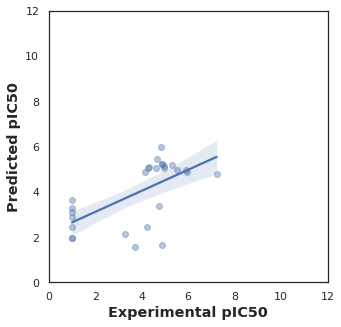

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show